In [4]:
target = '25_1.jpg'

In [5]:
from PIL import Image
import numpy as np

with Image.open(f"cropped_images/{target}") as img:
    div = img.size[1] / 500
    img = img.resize((int(img.size[0]/div), int(img.size[1] / div))) # resize image to (x, 500)
    
    
    img.show()
    
    print(img.size)

(401, 500)


In [7]:
    img_np = np.array(img)
    pallet = np.zeros(img_np.shape[:2])
    
    for y in range(img.width):
        for x in range(img.height):
            rgb = img_np[x, y]
            if rgb[1] > rgb[0] * 1.1 and rgb[1] > rgb[2] * 1.1: # keep green areas
                pallet[x,y] = rgb[1]
        
Image.fromarray(pallet).show()

In [9]:
from matplotlib import pyplot as plt

transposed_img = pallet.transpose() # transpose image to easily detect the bottom of an object
Image.fromarray(transposed_img).show()

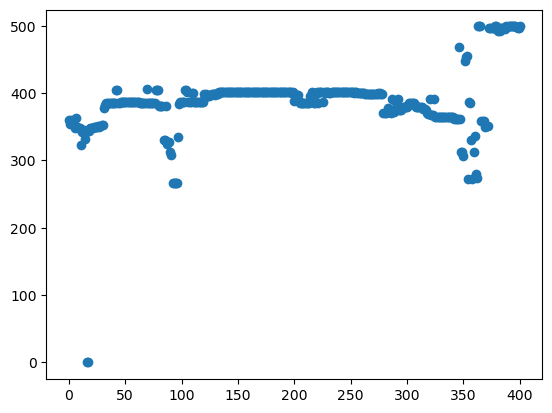

In [13]:
siluet=[]

for idx, row in enumerate(transposed_img):
    indices = np.where(row != 0)
    
    try:
        siluet.append(indices[0][-1]) # keep colored indices
    except:
        if len(indices[0]) == 0:
            siluet.append(0)
            
plt.scatter(range(len(siluet)), siluet)

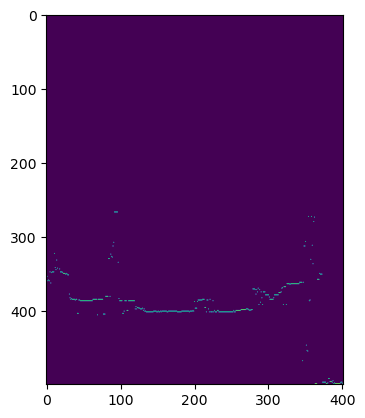

In [14]:
final = np.zeros(transposed_img.transpose().shape)

for x in range(final.shape[1]):
    if siluet[x] > img.size[1] / 3:  # leave only the two-thirds of an image
        final[siluet[x], x] = 255
        
plt.imshow(final)

answer: 0 degrees


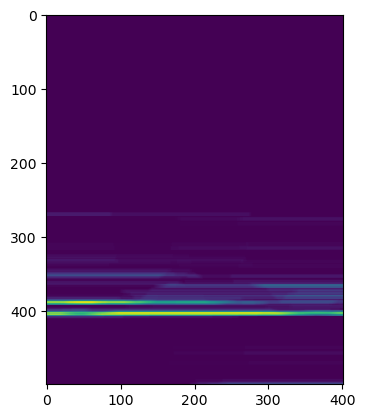

In [17]:
import cv2

max_values = []

for i in ['0','-15','-30','15','30']:
    with Image.open(f"kernels/degree{i}.png") as degree:
        kernel = np.array(degree)
        a = cv2.filter2D(final, -1, kernel)
        max_values.append(np.max(a)) # get max values of each kernel

answer = ['0','-15','-30','15','30'][np.argmax(max_values)] # kernel with the largest value is the answer

with Image.open(f"kernels/degree{answer}.png") as degree:
    kernel = np.array(degree)
    a = cv2.filter2D(final, -1, kernel)
    plt.imshow(a)
    
print(f"answer: {answer} degrees")